1. Deep Learning for Classification (Neural Networks)

**Section 1**: Introduction (5 points)

**Problem Statement:**: Credit Card Fraud Detection (Classification: 0 - Not Fraud, 1: Fraud) using Deep Learning

**Data Description:** : We use the following data: https://www.kaggle.com/code/codeaesthete/credit-card-fraud-detection-deep-neural-networks/input for the analysis and fraud detection. The dataset description as given by kaggle -

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise

We are referring for the code to: https://www.kaggle.com/code/codeaesthete/credit-card-fraud-detection-deep-neural-networks/notebook

**Section 2**: **Implementation - Code and Notes**

In [2]:
# importing necessary libraries

import pandas as pd
import numpy as np
import keras

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



In [3]:
df = pd.read_csv('/content/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

Removing missing values



In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Splitting the Data into independent variables and target

In [8]:
data = df.iloc[:, :-1]
targets = df.iloc[:,-1]

print(data.shape)
print(targets.shape)

(284807, 30)
(284807,)


Getting train, test split

In [9]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=.3)
train_data, validation_data, train_targets, validation_targets = train_test_split(train_data, train_targets, test_size=.2)

Standardizing the data

In [10]:
mean = np.mean(train_data)
std = np.std(train_data)

train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Implementing deep learning model with 1 input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu and finally a sigmoid layer for classification

In [11]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(10, input_shape=(train_data.shape[1],), activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Compilation Step - Defining optimzer and loss function

In [12]:
from sklearn.metrics import classification_report

model.compile(optimizer='rmsprop', loss='binary_crossentropy')

Model Training

In [13]:
history = model.fit(train_data, train_targets, epochs=50, batch_size=64)

Epoch 1/50
2493/2493 [==============================] - 5s 2ms/step - loss: 0.0280
Epoch 2/50
2493/2493 [==============================] - 6s 2ms/step - loss: 0.0053
Epoch 3/50
2493/2493 [==============================] - 4s 2ms/step - loss: 0.0047
Epoch 4/50
2493/2493 [==============================] - 4s 2ms/step - loss: 0.0044
Epoch 5/50
2493/2493 [==============================] - 6s 2ms/step - loss: 0.0044
Epoch 6/50
2493/2493 [==============================] - 4s 2ms/step - loss: 0.0044
Epoch 7/50
2493/2493 [==============================] - 4s 2ms/step - loss: 0.0042
Epoch 8/50
2493/2493 [==============================] - 5s 2ms/step - loss: 0.0042
Epoch 9/50
2493/2493 [==============================] - 4s 2ms/step - loss: 0.0042
Epoch 10/50
2493/2493 [==============================] - 4s 2ms/step - loss: 0.0042
Epoch 11/50
2493/2493 [==============================] - 5s 2ms/step - loss: 0.0043
Epoch 12/50
2493/2493 [==============================] - 4s 2ms/step - loss: 0.0042
E

**Section 3: Analysis** (10 points)

In [14]:
test_preds = model.predict(test_data)
test_preds = np.round(test_preds)
print(classification_report(test_targets, test_preds))

2671/2671 [==============================] - 4s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85298
           1       0.85      0.80      0.82       145

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443



As we can see from the classification report, the model is able to identify non fraud transactions with perferct precision and recall (100 %).

The model is able to identify frauds with 85% of precision and 80% of recall.


**Discussion:** Delve into the pros and cons of the model, commenting on potential
overfitting, or other relevant observations

As we can see, The model prefers to classify a transaction as non fraud over fraud which should generally be the case so not to identify a genuine transaction as fraud and cause an inconvinience to the customers. Due to highly unbalanced nature of the dataset with non fraud examples in quantity much more than the fraud ones, the model learns to identify non fraud transactions really well but lacks the ability to identify the fraud transactions. Resampling of the datset to make the classes balanced may improve the model's performance

**Pros of the model:**
1. Automatic feature learning: Deep learning algorithms can automatically learn features from the data, which means that they don’t require the features to be hand-engineered.

2. Handling large and complex data is easily possible

3. Generally Improved performance over traditional ML classification techniques

4. Calssifier can handle non-linear relationships boundary pretty good

5. Deep learning classificationmodel generalize well if trained properly.

**Cons of the models:**

1. Deep learning classification models have high memory requirements

2. They require greater time to train the models over traditional ML techniques

3. In case of smaller datasets, deep learning classification models tend to overfit quickly

4. There is loss of interpretability when working with these models.

5. Deep learning classification algorithms rely extensively on the quality of the data they are trained on. If the data is noisy, incomplete, or biased, the model’s performance will be negatively affected.

2. Deep Learning for Regression (Neural Networks)

**Section 1**: Introduction (5 points)

**Problem Statement:**: California Housing price prediction using deeplearning

**Data Description:** :
The data we use is the California housing prices dataset, in which we are going to predict the median housing prices. The data is available at https://github.com/timothypesi/Data-Sets-For-Machine-Learning-/blob/main/california_housing_train.csv and https://github.com/timothypesi/Data-Sets-For-Machine-Learning-/blob/main/california_housing_test.csv

We are referring for the code to: https://www.analyticsvidhya.com/blog/2021/08/a-walk-through-of-regression-analysis-using-artificial-neural-networks-in-tensorflow/

**Section 2**: **Implementation - Code and Notes**

In [15]:
# import required libraries
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
TRAIN_DATA_PATH = '/content/california_housing_train.csv'
TEST_DATA_PATH = '/content/california_housing_test.csv'
TARGET_NAME = 'median_house_value'

Read the train and test data and split the data into features and targets.

In [16]:
train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)
x_train, y_train = train_data.drop(TARGET_NAME, axis=1), train_data[TARGET_NAME]
x_test, y_test = test_data.drop(TARGET_NAME, axis=1), test_data[TARGET_NAME]

Scale the data

In [32]:
def scale_datasets(x_train, x_test):

  """
  Standard Scale test and train data
  Z - Score normalization
  """
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)



Defining the model -
We are going to build the Neural Network model using TensorFlow’s Sequential class. Here we have used four layers. The first layer consists of 160 hidden units/ neurons with the ReLU activation function. ReLU stands for Rectified Linear Units. The second layer consists of 480 hidden units with the ReLU activation function. The third layer consists of 256 hidden units with the ReLU activation function. The final layer is the output layer which consists of one unit with a linear activation function.

In [33]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

Defining the loss function and training the model

In [34]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle,
    optimizer=Adam(learning_rate=learning_rate),
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values,
    y_train.values,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
213/213 [==============================] - 3s 8ms/step - loss: 5.8731 - mean_squared_logarithmic_error: 5.8601 - val_loss: 0.6591 - val_mean_squared_logarithmic_error: 0.6552
Epoch 2/10
213/213 [==============================] - 1s 7ms/step - loss: 0.2561 - mean_squared_logarithmic_error: 0.2559 - val_loss: 0.3669 - val_mean_squared_logarithmic_error: 0.3719
Epoch 3/10
213/213 [==============================] - 1s 7ms/step - loss: 0.1912 - mean_squared_logarithmic_error: 0.1912 - val_loss: 0.2720 - val_mean_squared_logarithmic_error: 0.2794
Epoch 4/10
213/213 [==============================] - 1s 7ms/step - loss: 0.1541 - mean_squared_logarithmic_error: 0.1542 - val_loss: 0.2066 - val_mean_squared_logarithmic_error: 0.2145
Epoch 5/10
213/213 [==============================] - 2s 7ms/step - loss: 0.1271 - mean_squared_logarithmic_error: 0.1272 - val_loss: 0.1593 - val_mean_squared_logarithmic_error: 0.1672
Epoch 6/10
213/213 [==============================] - 2s 11ms/step - l

**Section 3: Analysis** (10 points)

Visualize the loss

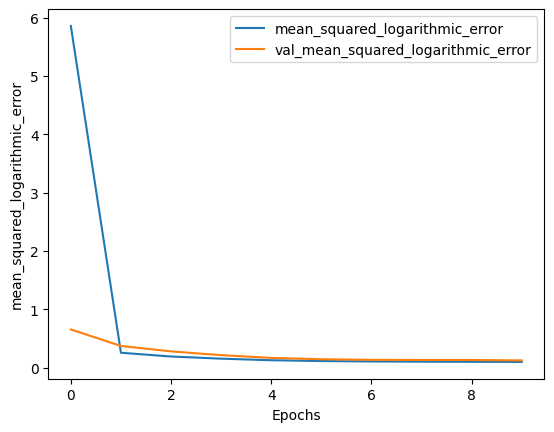

In [35]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

As we can see, after only 2 epochs the loss is very low and it flattens out afterwards.

In [36]:
pred = model.predict(x_test_scaled.values)

94/94 [==============================] - 0s 2ms/step


In [37]:
# these are the predictions for the house prices
pred

array([[343485.72],
       [188912.1 ],
       [255278.56],
       ...,
       [ 99549.53],
       [131533.03],
       [492415.5 ]], dtype=float32)

Checking the quality of predictions with mean squared loss as the metric

In [38]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

4858810417.278506

**Discussion:** Delve into the pros and cons of the model, commenting on potential
overfitting, or other relevant observations

We are getting a relatively larger mean squared error, but this is as we are predicting large numbers, rescaling will reduce this mean squared error significantly. Another reason behind this is the neural network may be overfitting on training data and is failing to generalize on test data. We need to get much larger data for our model to perform well.

**Pros of the model:**
1. Automatic feature learning: Deep learning algorithms can automatically learn features from the data, which means that they don’t require the features to be hand-engineered.

2. Deep learning regression models can handle large and complex data easily

3. Generally Improved performance over traditional ML regression techniques

4. Deep learning regression models can handle non-linear relationships extremely well

5. Deep learning regression model generalize well if trained properly.

**Cons of the models:**

1. Deep learning regression models have high memory requirements

2. They require greater time to train the models over traditional ML regression techniques

3. In case of smaller datasets, deep learning models tend to overfit quickly as in our case

4. There is loss of interpretability when working with these models.

5. Deep learning regression algorithms rely extensively on the quality of the data they are trained on. If the data is noisy, incomplete, or biased, the model’s performance will be negatively affected.

3. RNNs

**Section 1**: Introduction (5 points)

**Problem Statement:**: Time series forecasting of google's stock data with RNN

**Data Description:** :
This code uses the yf.download() method of the yfinance library to download historical stock data for Google from Yahoo Finance. Using the dt.datetime() method of the datetime module, the start and end dates of the time period for which the data has been obtained are given.

We are referring for the code to: https://www.geeksforgeeks.org/time-series-forecasting-using-recurrent-neural-networks-rnn-in-tensorflow/

**Section 2**: **Implementation - Code and Notes**

In [39]:
# importing necessary libraries

import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import math

In [40]:
#the start and end date
start_date = dt.datetime(2020,4,1)
end_date = dt.datetime(2023,4,1)

#loading from yahoo finance
data = yf.download("GOOGL",start_date, end_date)

pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns',5)
print(data)

[*********************100%%**********************]  1 of 1 completed
                  Open        High  ...   Adj Close    Volume
Date                                ...                      
2020-04-01   56.200001   56.471001  ...   55.105000  51970000
2020-04-02   55.000000   56.138500  ...   55.851501  56410000
...                ...         ...  ...         ...       ...
2023-03-30  100.910004  101.160004  ...  100.889999  33086200
2023-03-31  101.300003  103.889999  ...  103.730003  36863400

[756 rows x 6 columns]


Splitting datset in train and test split

In [41]:
# Setting 80 percent data for training
training_data_len = math.ceil(len(data) * .8)
training_data_len

#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:1]
test_data = data[training_data_len:].iloc[:,:1]
print(train_data.shape, test_data.shape)


(605, 1) (151, 1)


This code creates a numpy array called dataset_train and populates it with the “Open” pricing values from the training data. The 1-dimensional array is then transformed into a 2-dimensional array. The shape property, which returns the tuple (num_rows, num_columns) denoting the dataset_train array’s final shape

In [42]:
# Selecting Open Price values
dataset_train = train_data.Open.values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(605, 1)

Normalization is a crucial step in data preprocessing to enhance the effectiveness and interpretability of machine learning models. Hence MinMaxScaler from sklearn is imported to scale the dataset from 0 to 1. Using the sklearn fit_transform() method, the training dataset is scaled.

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])


[[0.01246754]
 [0.        ]
 [0.00764156]
 [0.01714287]
 [0.0607844 ]]


The same data preprocessing is done for test data.

In [44]:
# Selecting Open Price values
dataset_test = test_data.Open.values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(*scaled_test[:5])


[0.98362881] [1.] [0.83867656] [0.84481572] [0.86118691]


The time-series data must be divided into X_train and y_train from the training set and X_test and y_test from the testing set in this phase. It is done to turn time series data into a supervised learning problem that can be utilized to train the model. The loop generates input/output sequences of length 50 while iterating through the time series data. Using this method, we can forecast future values while taking into consideration the data’s temporal dependence on prior observations.

In [45]:
X_train = []
y_train = []
for i in range(50, len(scaled_train)):
	X_train.append(scaled_train[i-50:i, 0])
	y_train.append(scaled_train[i, 0])
	if i <= 51:
		print(X_train)
		print(y_train)
		print()

[array([0.01246754, 0.        , 0.00764156, 0.01714287, 0.0607844 ,
       0.05355843, 0.06139221, 0.05272728, 0.0727117 , 0.0761091 ,
       0.08682596, 0.0943896 , 0.08825454, 0.07413508, 0.0733039 ,
       0.08609869, 0.08051948, 0.09974024, 0.09516887, 0.12727273,
       0.12018702, 0.11641037, 0.1081195 , 0.12337662, 0.13402599,
       0.13574544, 0.14640004, 0.14378702, 0.16011432, 0.14345973,
       0.12130912, 0.12896625, 0.13588574, 0.14830132, 0.15021299,
       0.16155324, 0.15787013, 0.17764155, 0.16623377, 0.15584416,
       0.16645714, 0.16919484, 0.17402597, 0.178026  , 0.17495062,
       0.16396881, 0.16949613, 0.17934547, 0.18779741, 0.17715843])]
[0.16927791446834417]

[array([0.01246754, 0.        , 0.00764156, 0.01714287, 0.0607844 ,
       0.05355843, 0.06139221, 0.05272728, 0.0727117 , 0.0761091 ,
       0.08682596, 0.0943896 , 0.08825454, 0.07413508, 0.0733039 ,
       0.08609869, 0.08051948, 0.09974024, 0.09516887, 0.12727273,
       0.12018702, 0.11641037, 0.10

Doing same thing for test set

In [46]:
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
	X_test.append(scaled_test[i-50:i, 0])
	y_test.append(scaled_test[i, 0])


the data is converted into a format that is suitable for input to an RNN. np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) transforms the X_train array, which was originally a 2-dimensional array of shape (samples, features), into a 3-dimensional array of shape (samples, time steps, features), where time steps denotes the number of time steps in the input sequence and features denotes the number of features in the input data. Size 1 is an additional dimension that serves as an indication that each time step only has a single feature.

The y_train array is transformed from a 1-dimensional array of shape (samples) into a 2-dimensional array of shape (samples, 1) by np.reshape(y_train, (y_train.shape[0], 1)), where each row represents the output value at a certain time step.

In [47]:
# For training set:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

# For testing set:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)


X_train : (555, 50, 1) y_train : (555, 1)
X_test : (101, 50, 1) y_test : (101, 1)


In [48]:
# importing rnn libraries

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

Using the Keras API, this code creates a recurrent neural network (RNN) with four layers of basic RNNs and a dense output layer. It makes use of the tanh hyperbolic tangent activation function. To avoid overfitting, a dropout layer with a rate of 0.2 is introduced. It employs the optimizer as Adam, mean squared error as the loss function, and accuracy as the evaluation metric while compiling. With a batch size of 2, it fits the model to the training data for 20 epochs. The number of parameters in each layer and the overall number of parameters in the model are listed in a summary of the model architecture.



In [49]:
# initializing the RNN
regressor = Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True,
						input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True))

regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True))

regressor.add( SimpleRNN(units = 50))

# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,
								momentum=0.9,
								nesterov=True),
				loss = "mean_squared_error")

# fitting the model
regressor.fit(X_train, y_train, epochs = 20, batch_size = 2)
regressor.summary()

Epoch 1/20
278/278 [==============================] - 14s 38ms/step - loss: 0.0150
Epoch 2/20
278/278 [==============================] - 11s 38ms/step - loss: 0.0036
Epoch 3/20
278/278 [==============================] - 9s 32ms/step - loss: 0.0029
Epoch 4/20
278/278 [==============================] - 13s 47ms/step - loss: 0.0026
Epoch 5/20
278/278 [==============================] - 11s 38ms/step - loss: 0.0025
Epoch 6/20
278/278 [==============================] - 11s 40ms/step - loss: 0.0023
Epoch 7/20
278/278 [==============================] - 11s 38ms/step - loss: 0.0021
Epoch 8/20
278/278 [==============================] - 9s 34ms/step - loss: 0.0020
Epoch 9/20
278/278 [==============================] - 11s 38ms/step - loss: 0.0019
Epoch 10/20
278/278 [==============================] - 11s 38ms/step - loss: 0.0019
Epoch 11/20
278/278 [==============================] - 10s 37ms/step - loss: 0.0021
Epoch 12/20
278/278 [==============================] - 9s 32ms/step - loss: 0.0019
Epoc

**Section 3: Analysis** (10 points)

4/4 [==============================] - 1s 21ms/step


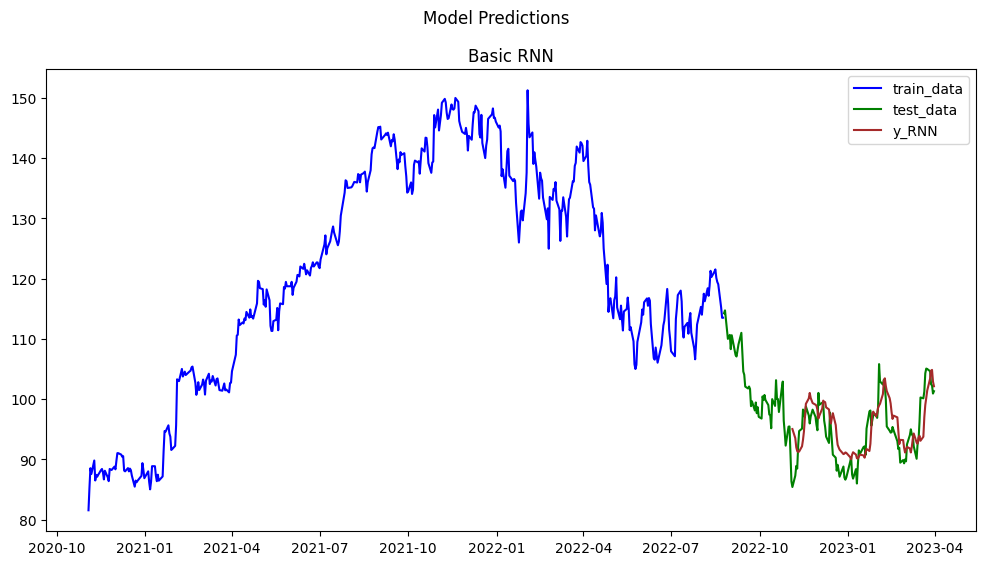

In [50]:
# predictions with X_test data
y_RNN = regressor.predict(X_test)

# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN)

fig, axs = plt.subplots(figsize =(12,6),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for RNN predictions
axs.plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs.plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs.plot(test_data.index[50:], y_RNN_O, label = "y_RNN", color = "brown")
axs.legend()
axs.title.set_text("Basic RNN")


plt.show()

As we can see from the plot, the basic RNN is approximately able to predict the future with significant accuracy

**Discussion:** Delve into the pros and cons of the model, commenting on potential
overfitting, or other relevant observations

The basic RNN model is performing pretty well on predicting the future stock movement. With just 2 year of data it is predicting the stock movement for around 6 months with pretty good accuracy. Even though it is not exactly catching the stock values accurately, it successfully catches the trend or stock movement accurately which is what we generally need.

**Pros of the model:**
1. RNNs are designed to handle sequential data, making them well-suited for time series forecasting where the order of data points is crucial

2. RNNs can handle variable-length input sequences, which is important in time series forecasting where the length of historical data may vary.

3. RNNs have a memory element that enables them to retain information from previous time steps. This memory is especially beneficial for capturing long-term dependencies in time series data.

4. RNNs can be updated in real-time as new data becomes available, making them suitable for online learning scenarios.

5. RNN can capture complex patterns and relationships in the data without relying on manually engineered features

**Cons of the models:**

1. RNNs are prone to the vanishing gradient problem, where gradients become extremely small during backpropagation.

2. Standard RNNs often struggle to capture long-term dependencies in time series data. As the gap between relevant information in distant time steps increases, the ability of the network to remember and utilize that information diminishes. This limitation can impact the accuracy of forecasts for time series with long-term dependencies.

3. Training RNNs can be computationally intensive, particularly when dealing with large datasets and complex architectures.

4. RNNs are sensitive to the choice of hyperparameters, such as learning rates, sequence lengths, and network architectures. Finding the right combination of hyperparameters can be a time-consuming process, and suboptimal choices may lead to poor performance.

5. Standard RNNs have limited memory capacity

4. LSTMs



**Section 1**: Introduction (5 points)

**Problem Statement:**: Time series forecasting of google's stock data with LSTMs

**Data Description:** :
We are using same datset as in previous code.
This code uses the yf.download() method of the yfinance library to download historical stock data for Google from Yahoo Finance. Using the dt.datetime() method of the datetime module, the start and end dates of the time period for which the data has been obtained are given.

We are referring for the code to: https://www.geeksforgeeks.org/time-series-forecasting-using-recurrent-neural-networks-rnn-in-tensorflow/

**Section 2**: **Implementation - Code and Notes**

We will not repeat the data cleaning and transforming process, we will use the cleaned data from previous example

This code creates a LSTM Model with three layers and a dense output layer. It employs the optimizer as Adam, mean squared error as the loss function, and accuracy as the evaluation metric while compiling. With a batch size of 1, it fits the model to the training data for 10 epochs. The number of parameters in each layer and the overall number of parameters in the model are listed in a summary of the model architecture.

In [53]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50,
					return_sequences = True,
					input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50,
					return_sequences = False))
regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
					loss = 'mean_squared_error',
					metrics = ["accuracy"])

#Fitting the model
regressorLSTM.fit(X_train,
				y_train,
				batch_size = 1,
				epochs = 12)
regressorLSTM.summary()


Epoch 1/12
555/555 [==============================] - 17s 24ms/step - loss: 0.0043 - accuracy: 0.0018
Epoch 2/12
555/555 [==============================] - 14s 25ms/step - loss: 0.0028 - accuracy: 0.0018
Epoch 3/12
555/555 [==============================] - 13s 24ms/step - loss: 0.0019 - accuracy: 0.0018
Epoch 4/12
555/555 [==============================] - 14s 24ms/step - loss: 0.0017 - accuracy: 0.0018
Epoch 5/12
555/555 [==============================] - 15s 27ms/step - loss: 0.0013 - accuracy: 0.0018
Epoch 6/12
555/555 [==============================] - 15s 26ms/step - loss: 0.0012 - accuracy: 0.0018
Epoch 7/12
555/555 [==============================] - 14s 25ms/step - loss: 0.0012 - accuracy: 0.0018
Epoch 8/12
555/555 [==============================] - 14s 24ms/step - loss: 0.0011 - accuracy: 0.0018
Epoch 9/12
555/555 [==============================] - 14s 24ms/step - loss: 0.0011 - accuracy: 0.0018
Epoch 10/12
555/555 [==============================] - 13s 24ms/step - loss: 9.880

**Section 3: Analysis** (10 points)

4/4 [==============================] - 1s 11ms/step


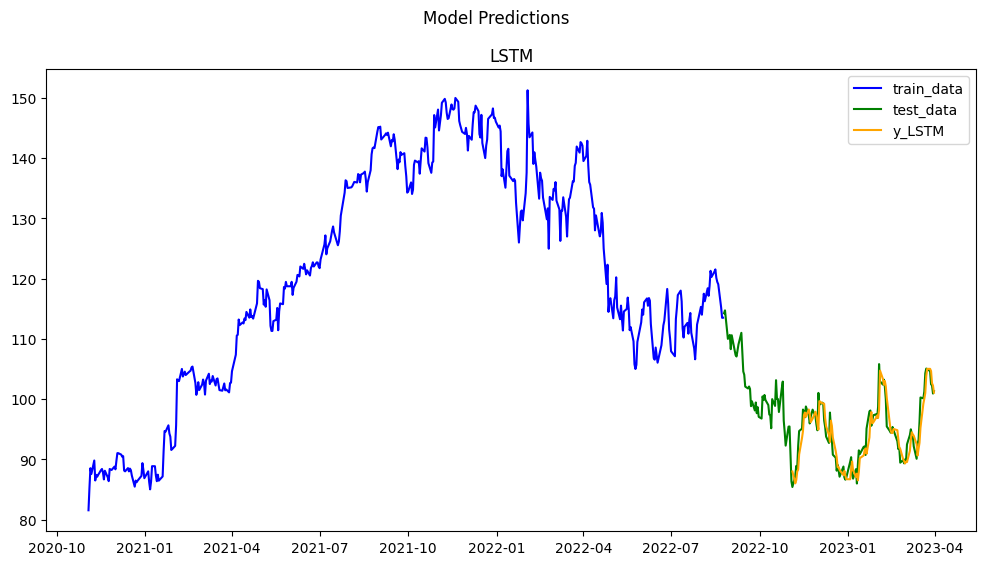

In [54]:
# predictions with X_test data
y_LSTM = regressorLSTM.predict(X_test)
y_LSTM_O = scaler.inverse_transform(y_LSTM)

fig, axs = plt.subplots(figsize =(12,6),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for LSTM predictions
axs.plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs.plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs.plot(test_data.index[50:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs.legend()
axs.title.set_text("LSTM")


As we can see in the figure, LSTM not only captures the stock movement, but it also captures the stock prices much more accurately than the previous RNN model

**Discussion:** Delve into the pros and cons of the model, commenting on potential
overfitting, or other relevant observations

This model is generalizing well. But with improved accuracy there is always the cost of more computation. Though LSTMs are performing much better than the RNN with only 12 epochs(compared to 20 for RNN) and are definitely the better choice to model the time series.

**Pros of the model:**
1. LSTMs are specifically designed to address the vanishing gradient problem associated with traditional RNNs, making them more capable of capturing and learning long-term dependencies in time series data.

2. LSTMs introduce a memory cell state that allows the network to retain and carry information across multiple time steps. This long-term memory capability helps LSTMs capture important patterns and dependencies in time series data over extended periods, making them well-suited for forecasting tasks that involve complex and distant relationships.

3. LSTMs employ gating mechanisms, such as the input gate, forget gate, and output gate, which provide the network with enhanced control over the flow of information. These gates regulate the information entering and leaving the memory cell, allowing the LSTM to selectively update and utilize the memory, making it more adaptable to different patterns in the time series.

4. LSTMs can be trained more efficiently than traditional RNNs because of their parallelization capabilities.

5. LSTMs are less sensitive to the length of input sequences compared to standard RNNs.

**Cons of the models:**

1. LSTMs are computationally more complex than some other neural network architectures. The additional mechanisms such as gates and memory cells increase the number of parameters in the model, leading to longer training times and higher computational requirements. This complexity can be a limiting factor in scenarios where computational resources are constrained.

2. LSTMs are known for their black-box nature, making it challenging to interpret the internal workings of the model.

3. LSTMs have a large number of parameters, which can lead to overfitting when trained on small datasets.

4. LSTMs, like other neural networks, are sensitive to the choice of hyperparameters, such as learning rates, layer sizes, and dropout rates. Finding the optimal set of hyperparameters can be a time-consuming process, and suboptimal choices may lead to inferior performance.

5. While LSTMs excel at capturing long-term dependencies, they may not always provide a significant performance improvement over simpler models like autoregressive models or moving averages for tasks involving short-term dependencies. In situations where the time series patterns are relatively simple or short-lived, the additional complexity of LSTMs may not be justified.